In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
state = 'RJ'

In [4]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [5]:
cases = c_data[state].resample('D').mean()#D,W,MS

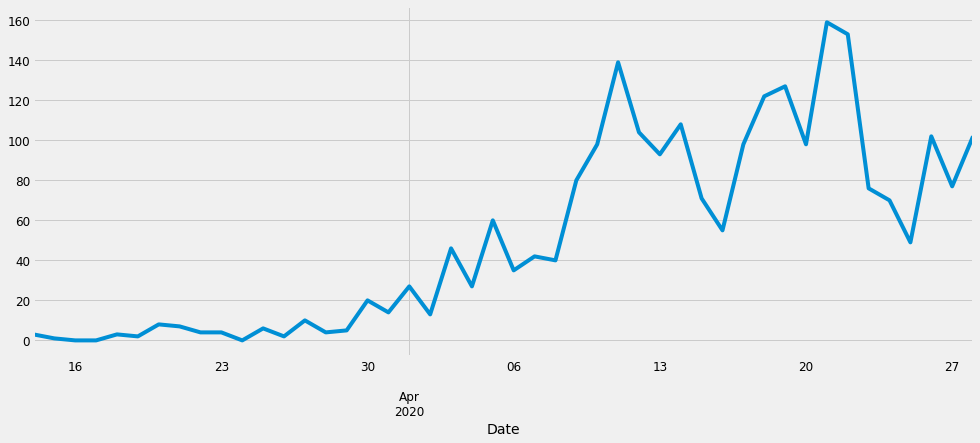

In [6]:
cases.plot(figsize=(15, 6))
plt.show()

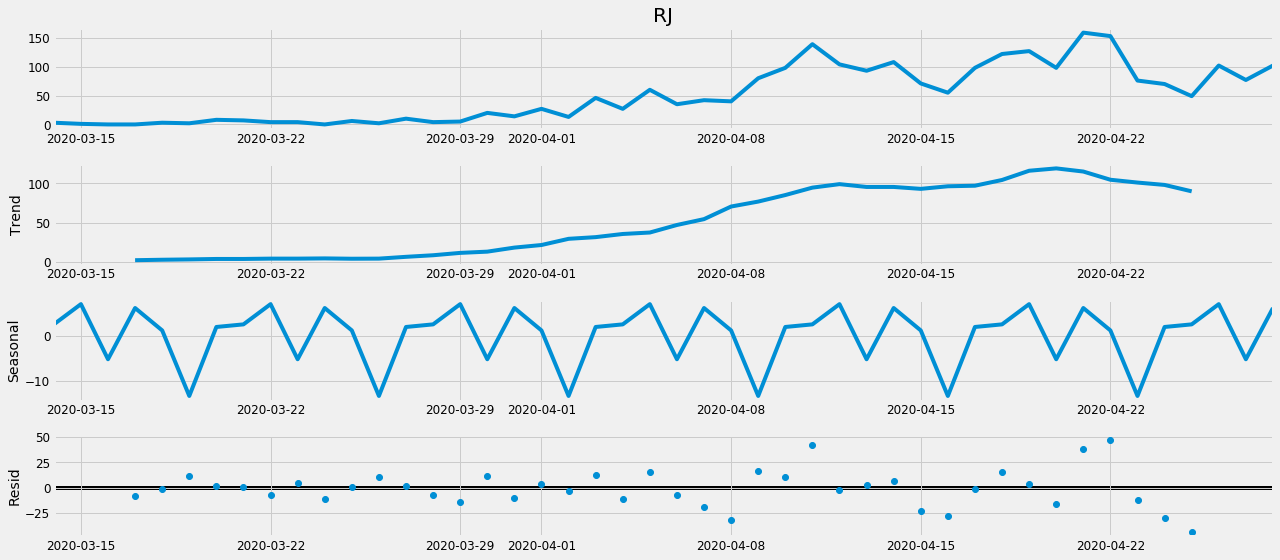

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [8]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:513.2002135229174
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1222.1064880196243
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:360.149467066432
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:238.38478470674417
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:370.5012415165173


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1224.8997290011273
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:248.89575221176275
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:238.08938597162802
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:469.913451265232
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2683.0623744284912
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:335.12891479875793
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:219.03897231732378
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:355.9761198384323
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2927.750244668012
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:238.8056180343293
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:220.5616994543835
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:411.51825593569123


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1094.1563736611283
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:318.72498462868566
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:206.09194147752572
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:320.4015600875079


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1088.849885938962
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:216.02107014490258
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:208.87708350007563
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:401.9648702576593
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1325.0939854795238


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:310.8109869380079
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:197.0623938420488
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:320.0213693183065


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1331.8877193766464
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:217.1982004190092
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.65435910855194
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:421.2218765871644


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1371.6297315839931
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:326.7768759310823
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:216.1103125278952
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:321.85981012200523


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1242.2047265042966
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:216.75766786473892
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:218.7196818207118
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:412.25010349748806


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1406.029183582361
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:319.60901098806073
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:208.74590087588254
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:322.0821538454804


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1276.4316292582125
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:218.47421460928592
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:211.39561430309683
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:410.82661054027676


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1232.7553363650536
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:319.58528673053127
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:207.5250478259765
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:311.8724137040152


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1224.6971259533705
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:208.18896091735354
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:210.16900711214964
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:402.83852997945866


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1154.891611720472
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:312.1740056318486
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:196.9790203177787
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:312.605784642195


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1161.6494328368976
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:207.50060670537795
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:199.14310071364278


In [10]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5985      0.567      1.055      0.291      -0.513       1.710
ma.L1         -1.0000   3391.415     -0.000      1.000   -6648.052    6646.052
ma.S.L12      -0.6444      1.195     -0.539      0.590      -2.986       1.697
sigma2      1036.2755   3.52e+06      0.000      1.000   -6.89e+06    6.89e+06


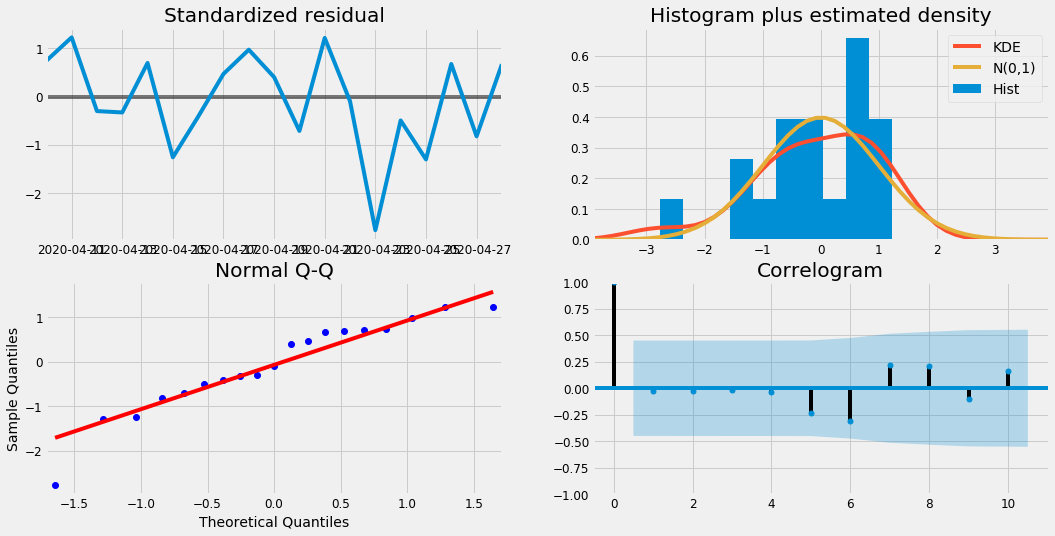

In [11]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

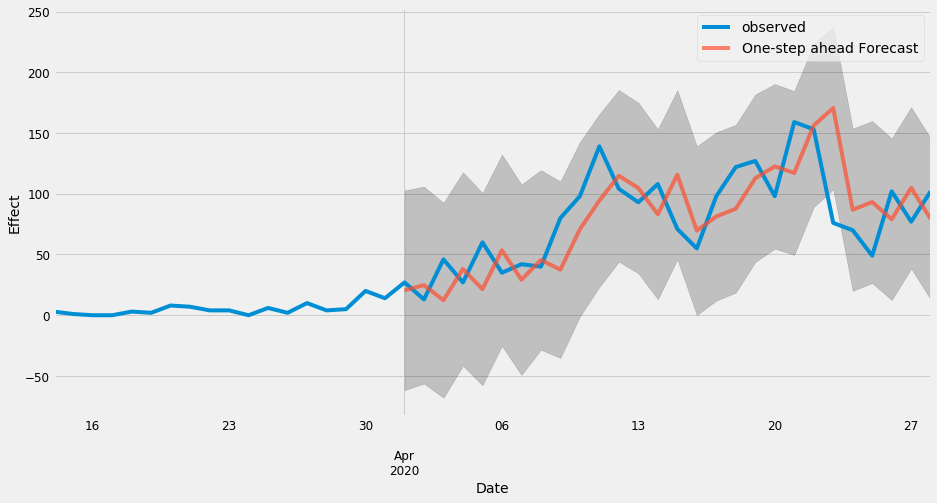

In [12]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [13]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 1003.79


In [14]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 31.68


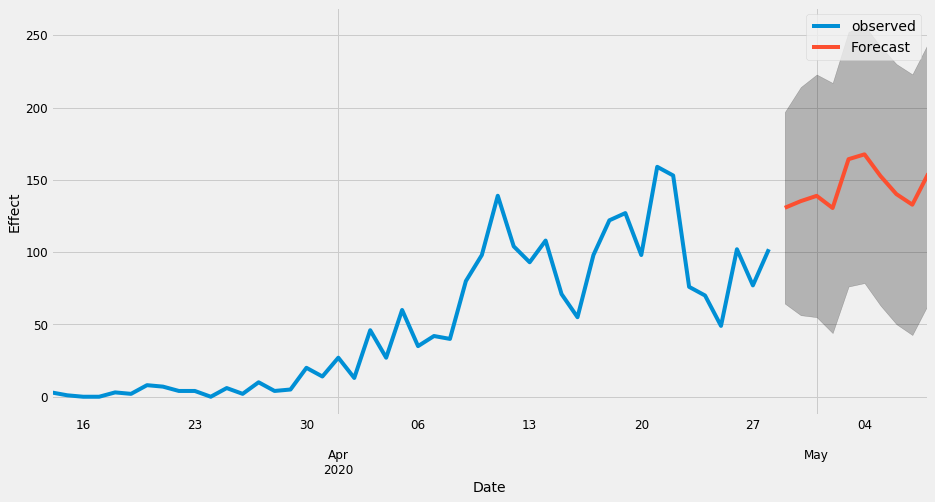

In [15]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [16]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [17]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [18]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,70,42
2020-04-25,49,20
2020-04-26,102,116
2020-04-27,77,115
2020-04-28,102,26


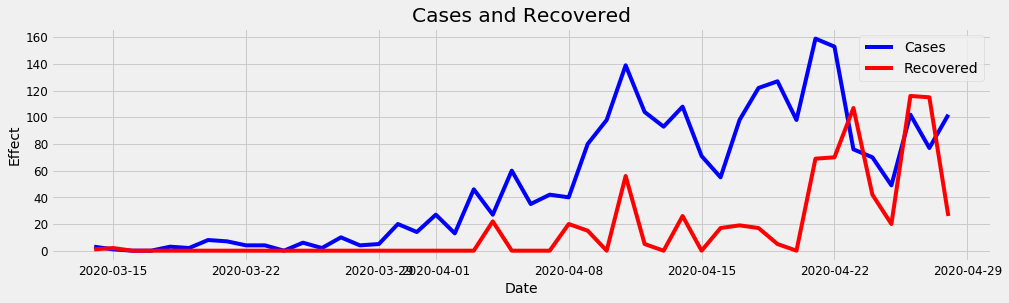

In [19]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [20]:
recovered = total_data['Recovered'].resample('D').mean()

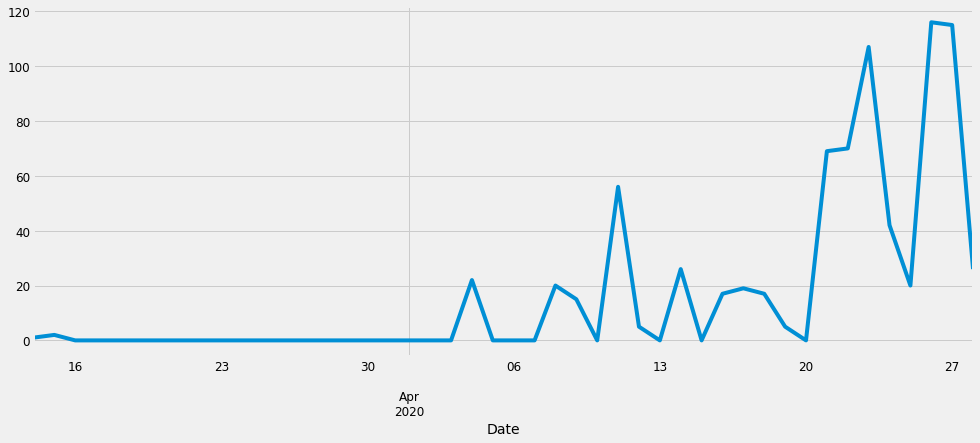

In [21]:
recovered.plot(figsize=(15, 6))
plt.show()

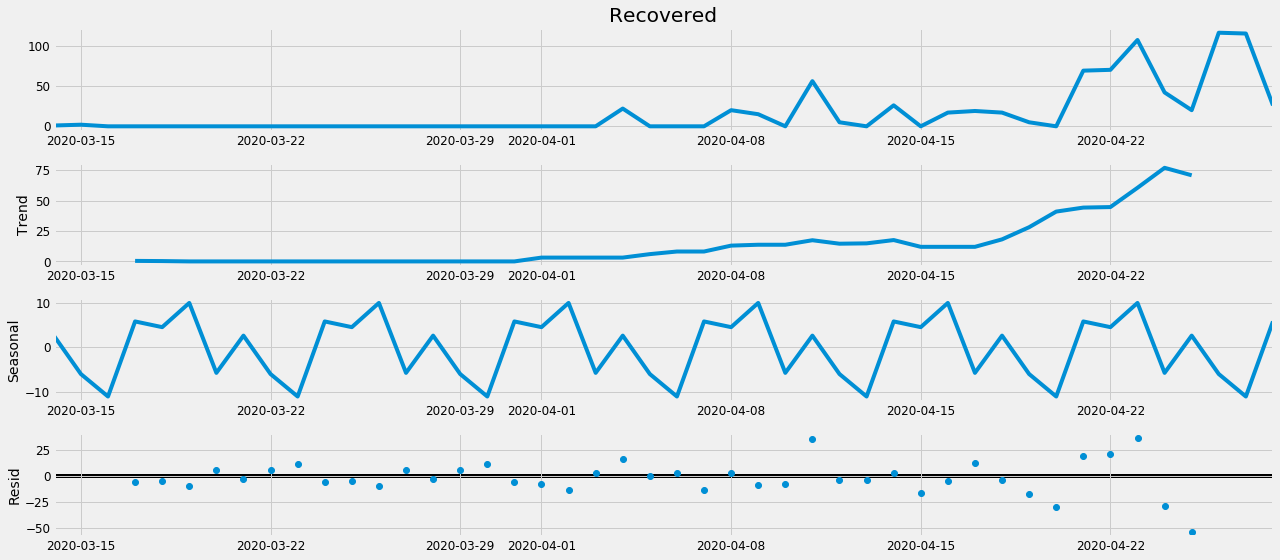

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:450.83029866314223
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1370.075475608806

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:329.6574602801439
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:219.68377320255036
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:334.4997122576326


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1307.9482605093685
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:227.23111368847302


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:220.0682864107108
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:420.64033163544843
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1404.4226562552021
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:308.06308288749005
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:203.72316828038487
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:327.5221244627591
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1261.4776415224978
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:222.37575252215237
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:205.72316714912915
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:423.39740256617887
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1387.8067793590076
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:315.27738684167207

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:208.34655866374106
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:325.27619601722836


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1460.9801243094796
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:217.80579917026938
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:210.34671297811806
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:403.1813775570544
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1318.143948564778
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:297.312075414942
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:193.93818270206816
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:316.74114530855786


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1238.8195186828905
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:212.24078280938562
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:195.93818158832744
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:426.0979164748222
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1448.1233642631717
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:318.2586468164674
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:214.81113320706896
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:320.2049593295793
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1433.6912515965475
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:214.86253455661978
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:216.8108885015928
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:409.2568746025785
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1406.4226562551971
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:309.8798352486042
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:205.70545641888913
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:315.5725894420199
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1392.4884863966463
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:215.3114260468958


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1233.2881309600414
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:315.0762104371287
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:208.96602357378094
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:316.6932025452558


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1156.3150221532153
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:209.02528999664528
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:210.96541665329232
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:405.0550480054355


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1470.3315969201883
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:299.2491687140478
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:195.90185691360875
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:309.8973266439234


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1388.6356461335572
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:205.1541562469289
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:197.90185692774563


In [24]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0657      0.521      0.126      0.900      -0.955       1.087
ma.L1         -0.7891      0.265     -2.983      0.003      -1.308      -0.271
ma.S.L12       0.2426      0.994      0.244      0.807      -1.706       2.191
sigma2      1151.8859    461.904      2.494      0.013     246.571    2057.201


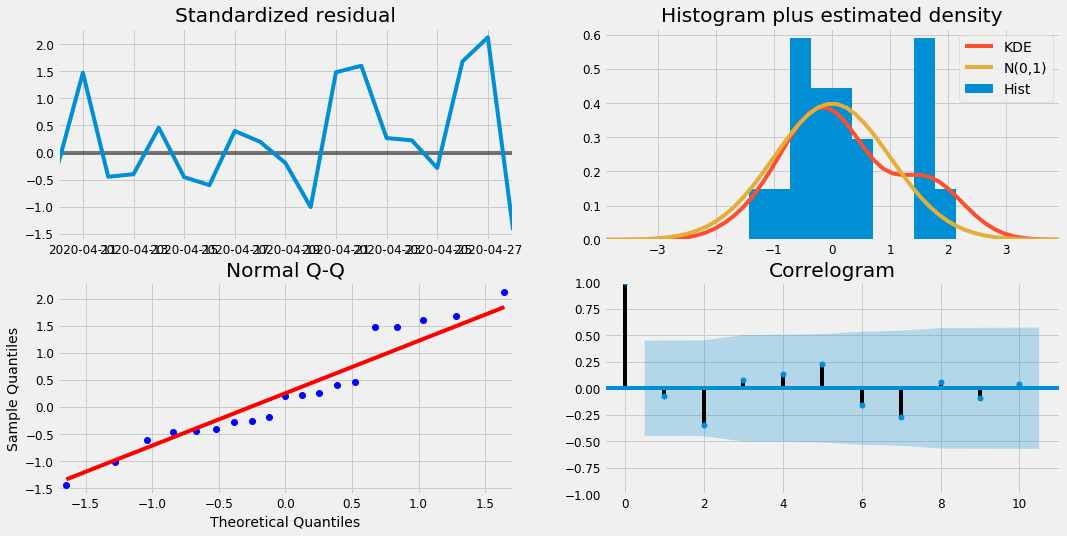

In [25]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

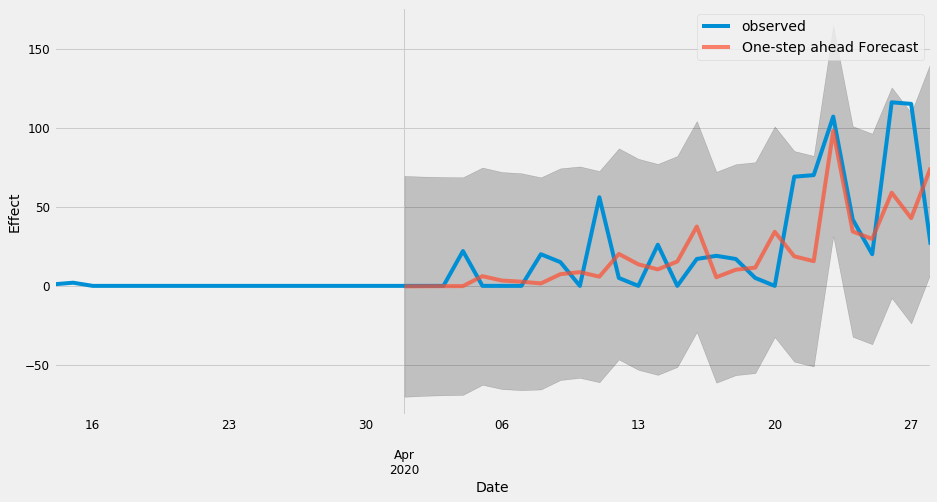

In [26]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [27]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 816.39


In [28]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 28.57


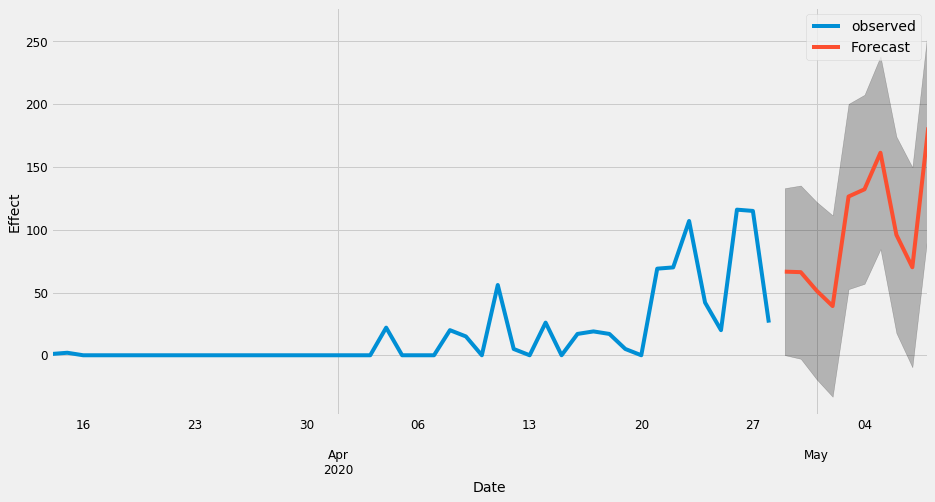

In [29]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

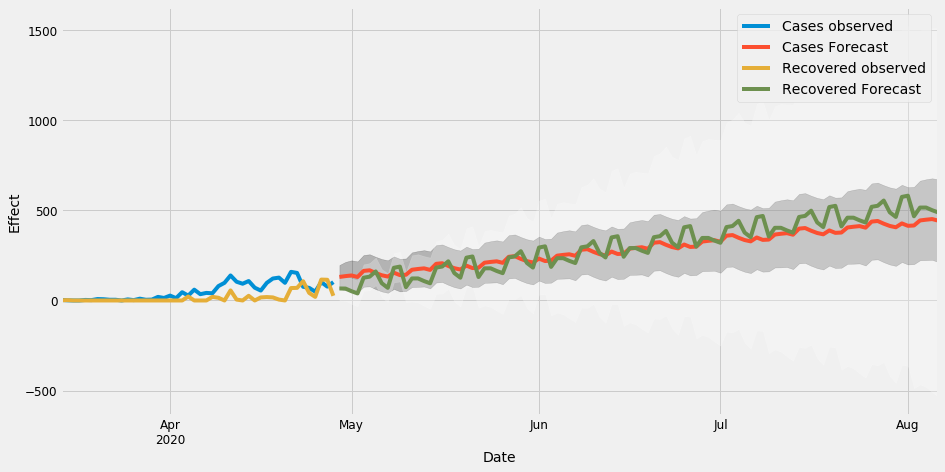

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [31]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [32]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [33]:
int(np.mean(cases_result_date)[0])

287

In [34]:
int(min(cases_result_date[0]))

130

In [35]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-29


In [36]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-10


In [38]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-01
